In [1]:
import gmpy2 
import math
from random import randint
from math import gcd
import numpy as np
import libnum
import cv2
from PIL import Image
import timeit
rs = gmpy2.random_state()

In [16]:
class Paillier(object):
    
 
    def __init__(self):
        
        self.publicKey = None
        self.privateKey = None
        
    def lcm(self, x, y):
        
        return x * y // gcd(x, y) 
    
    def sTn(self,m):
        arr = bytes(m, 'utf-8')
        m = int.from_bytes(arr, 'big')
        return m
          
     
    def getP(self):
        
        p = gmpy2.mpz_urandomb(rs, 1024)
        while not gmpy2.is_prime(p):
            p = p + 1
        return p
    
    def getKeys(self):
     
        #p = self.getP()
        #q = self.getP()
        
        p = 23
        q = 19
        
        n = p * q
        lamda = self.lcm(p-1, q-1)
        
        
        g = n + 1
        mu = (pow(g,lamda,n*n)-1) // n
        mu = libnum.invmod(mu, n)
        
        n = int(n)
        g = int(g)
        lamda = int(lamda)
        mu = int(mu)
        
        #mu = gmpy2.invert(lamda, n)
        
        self.publicKey = [n, g]
        self.privateKey = [lamda, mu]
    
    def encrypt(self, m):
        
        if isinstance(m, str):
            m = self.sTn(m)
        
        #print(m)
        
        n,g = self.publicKey
        r = randint(0,n)
        while gcd(n, r)!= 1:
            r = r + 1
        
        c = (pow(g, m, n*n) * pow(r, n, n*n)) % (n*n)
        
        # print(c)
        return c
    
    def decrypt(self,c):
        
        n, g = self.publicKey
        lamda, mu = self.privateKey
        
        c = (pow(c,lamda, n*n) - 1) // n * mu
        c = c % n
        c = int (c)
        # print(c)
        m = c
        #m = libnum.n2s(c)
        #m = m.decode("utf-8") 
        return m


    
if __name__ == "__main__":    
    string = 'CWRo get ae.'
    byte = ''
    text = 255 #byte
    
    p = Paillier()
    p.getKeys()
    
    
    c = p.encrypt(text) 
    m = p.decrypt(c)
    
    print("Plaintext:", text)
    print("Ciphertext:", c)
    print("Deciphertext: ", m)
    
        


Plaintext: 255
Ciphertext: 3164
Deciphertext:  255


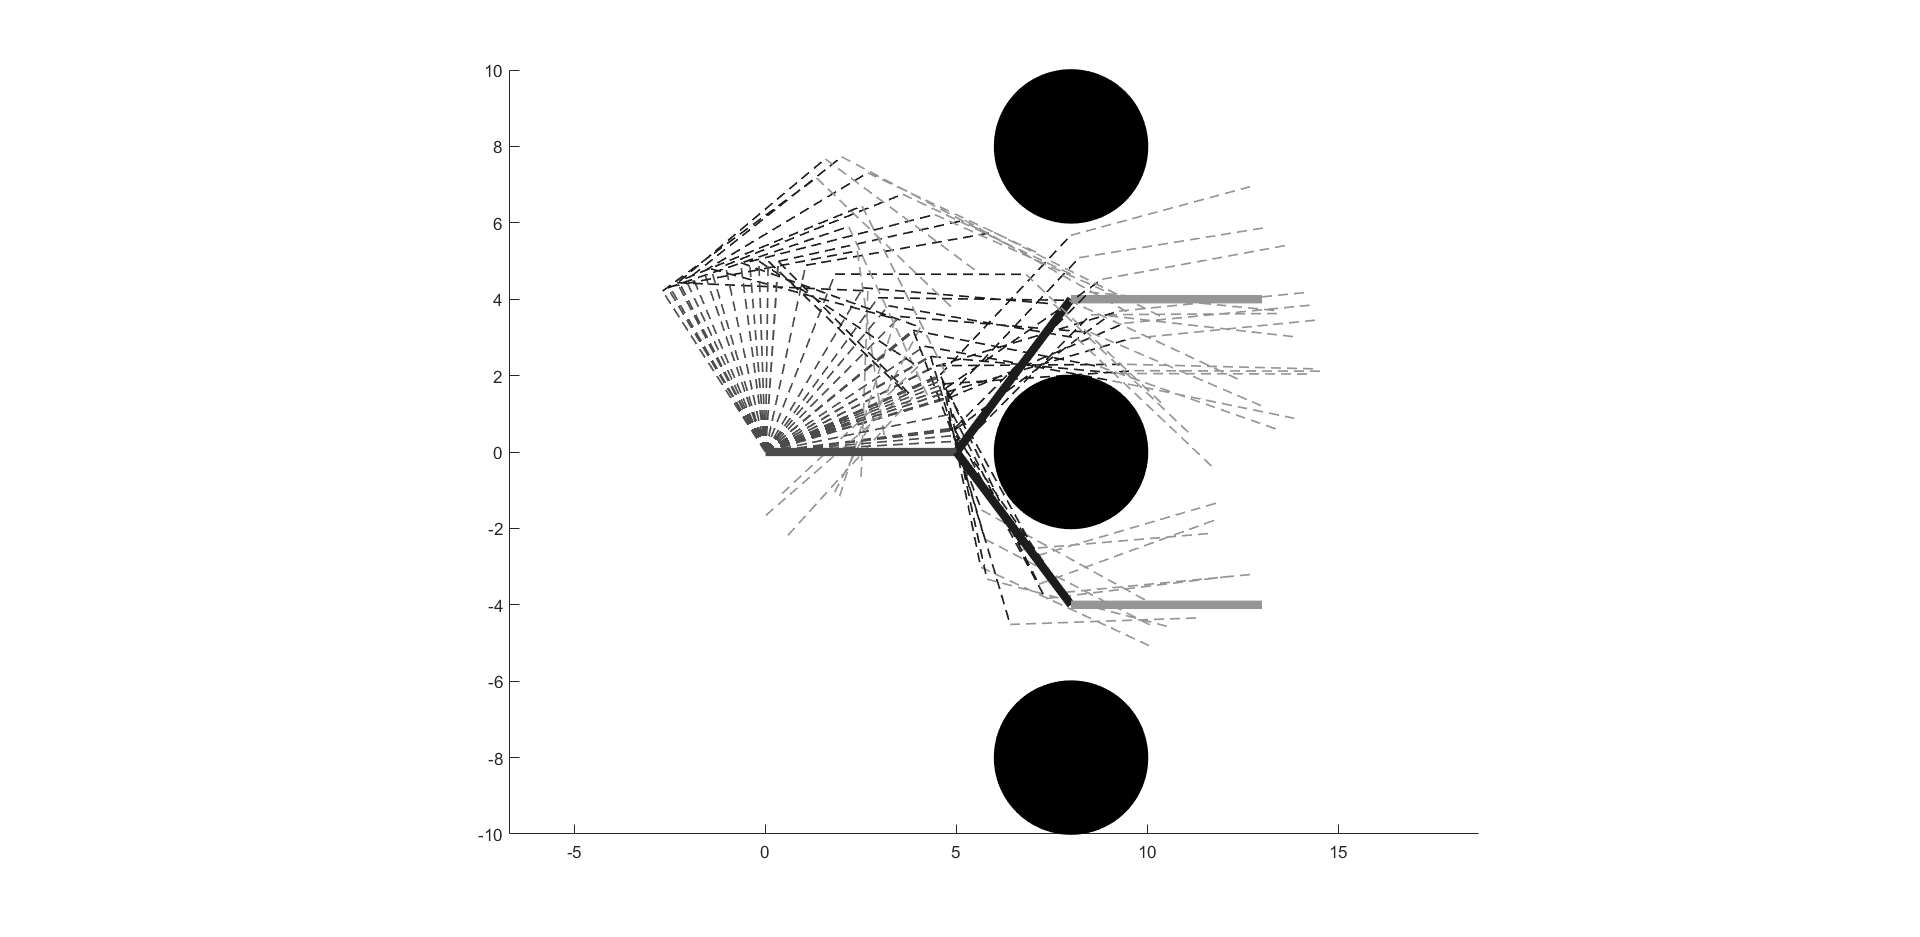

In [23]:
img = cv2.imread('rrt.png', 0)
image_o = Image.fromarray(img)
image_o

In [24]:
p = Paillier()
p.getKeys()

start = timeit.default_timer()
data_encrypted = [[p.encrypt(int(x)) for x in row] for row in img]
stop = timeit.default_timer()

print('Time for encoding: ', stop - start, 's') 


Time for encoding:  8.77169170000002 s


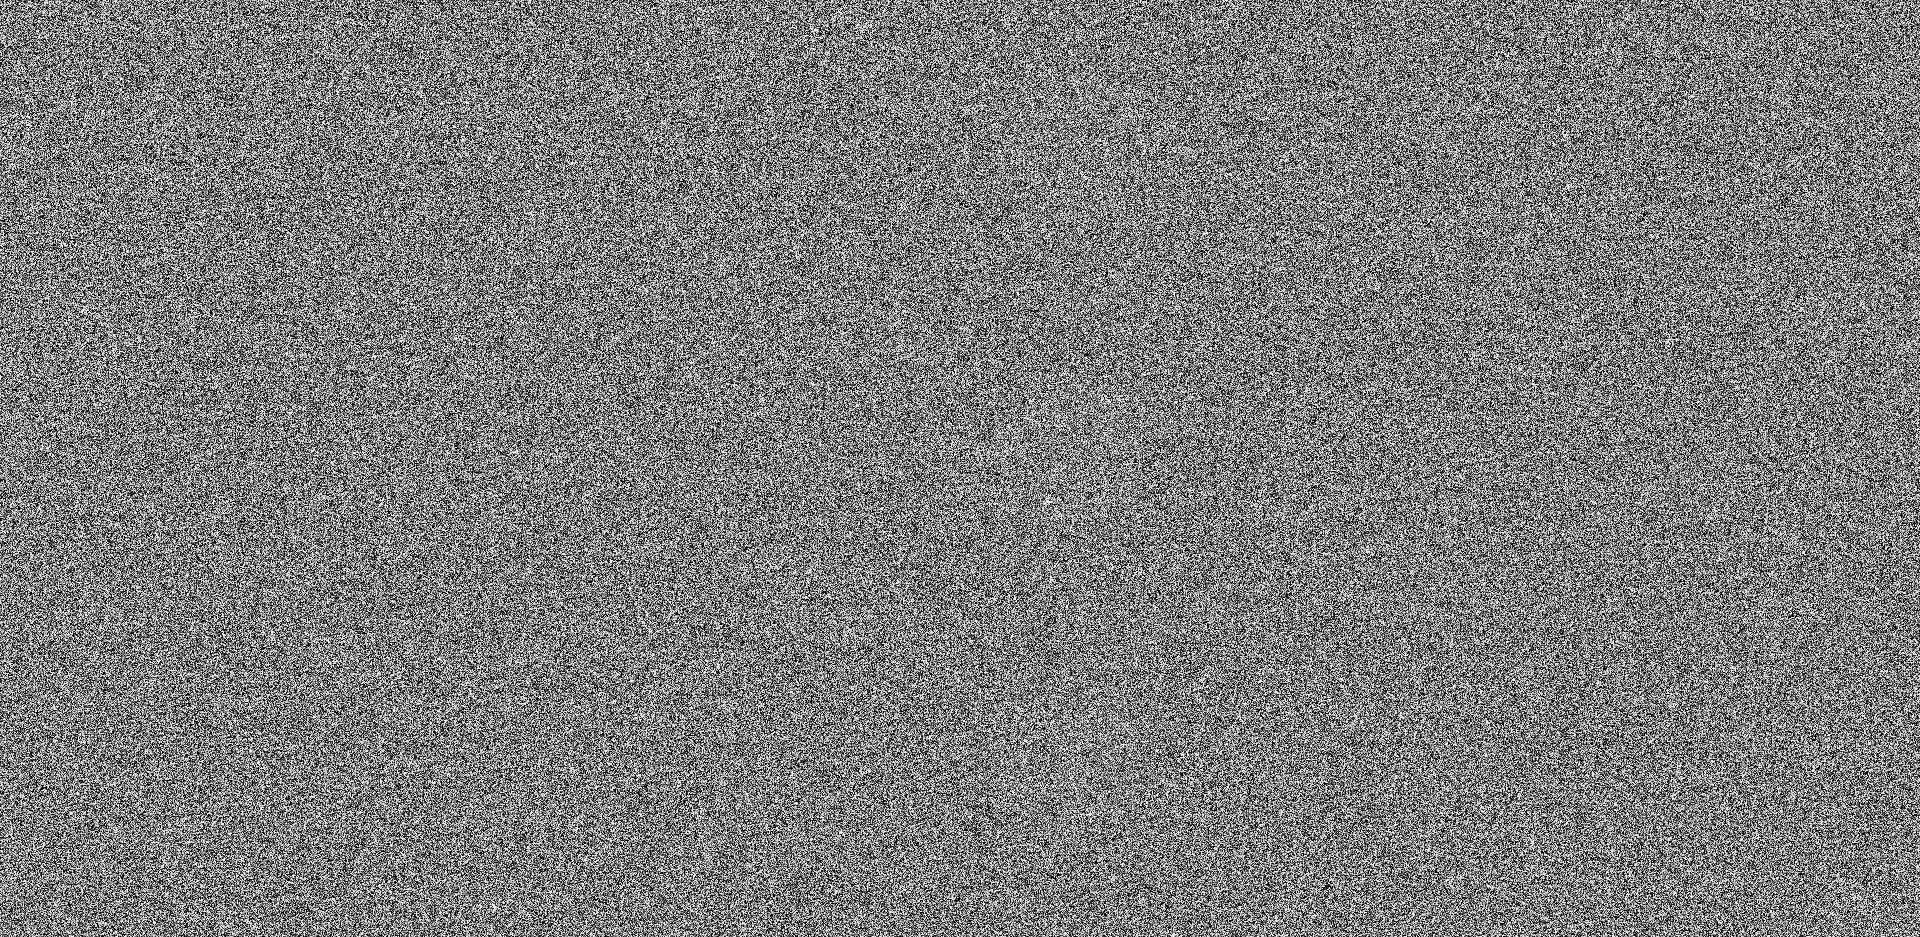

In [25]:
array_code = np.array(data_encrypted, dtype=np.uint8)
image_code = Image.fromarray(array_code)
image_code

In [26]:
start = timeit.default_timer()
data_decrypted = [[p.decrypt(x) for x in row] for row in data_encrypted]
stop = timeit.default_timer()

print('Time for encoding: ', stop - start, 's') 

Time for encoding:  3.1889112999999725 s


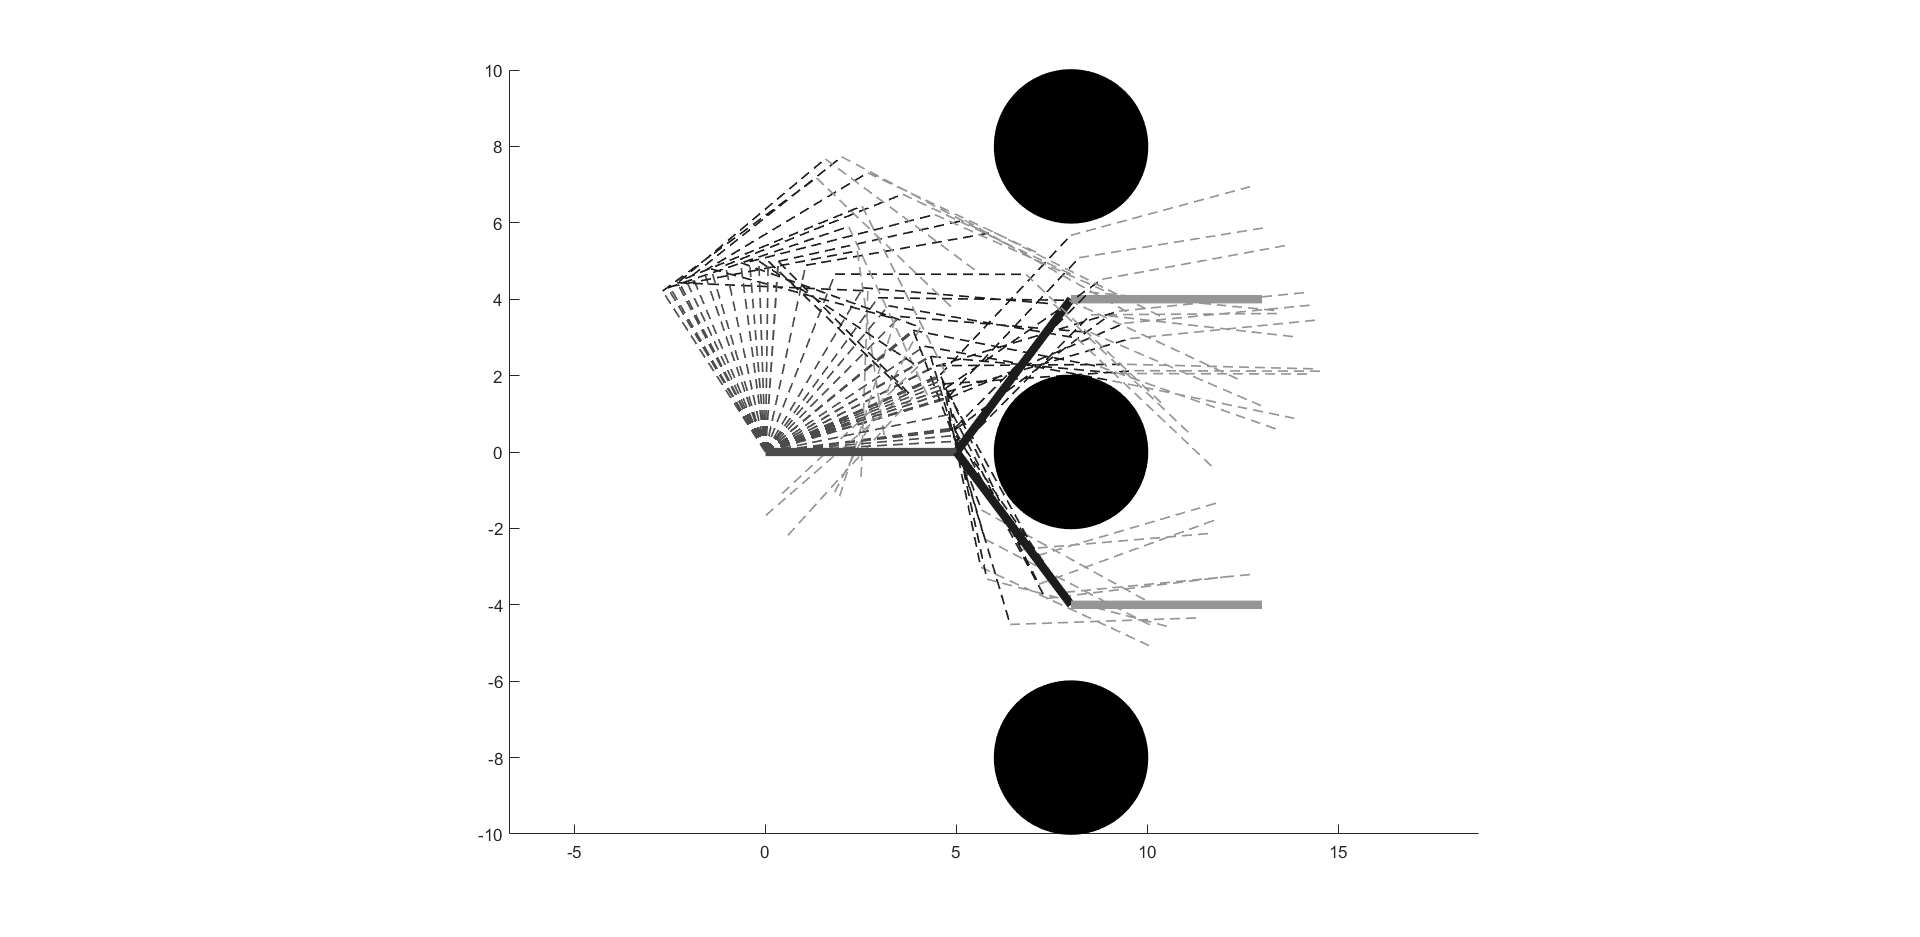

In [29]:
array_decode = np.array(data_decrypted, dtype=np.uint8)
image_decode = Image.fromarray(array)
image_decode

In [30]:
### check if the decode array is the same as the original img array
np.array_equal(array_decode, img)

True